# Chapter 6. Asset Pricing and Portfolio Management

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#!pip install --upgrade yfinance
import yfinance as yf

#!pip install statsmodels
#!pip install scipy

# Create a Data Set for Asset Allocation Analysis

In [111]:
# Top assets of NASDAQ Stock Exchange
nasdaq_tickers = [
    'MRNA',  # Moderna, Inc.
    'DLTR',  # Dollar Tree, Inc.
  # 'CEG',   # Constellation Energy Corporation (started from 2022-01-19)
    'ZS',    # Zscaler, Inc.
    'MCHP',  # Microchip Technology Incorporated
    'SBUX',  # Starbucks Corporation
    'HON',   # Honeywell International Inc.
    'JD',    # JD.com, Inc.
    'DDOG',  # Datadog, Inc.
    'AMAT',  # Applied Materials, Inc.
    'AAPL',  # Apple Inc.
    'AMGN',  # Amgen Inc.
    'INTU',  # Intuit Inc.
    'PCAR',  # PACCAR Inc
    'MDLZ',  # Mondelez International, Inc.
    'CSGP',  # CoStar Group, Inc.
    'FTNT',  # Fortinet, Inc.
    'KDP',   # Keurig Dr Pepper Inc.
    'META',  # Meta Platforms, Inc.
    'VRSK',  # Verisk Analytics, Inc.
    'MAR',   # Marriott International, Inc.
    'MRVL',  # Marvell Technology, Inc.
    'AZN',   # AstraZeneca PLC
    'ILMN',  # Illumina, Inc.
    'ENPH',  # Enphase Energy, Inc.
    'SIRI',  # Sirius XM Holdings Inc.
    'MELI',  # MercadoLibre, Inc.
    'ZM',    # Zoom Video Communications, Inc.
    'TSLA',  # Tesla, Inc.
    'BKR',   # Baker Hughes Company
    'URBN'   # Urban Outfitters, Inc. 
]

In [112]:
start='2021-01-01'
end='2023-10-01'

In [113]:
# Download data from the Yahoo Finance
df = yf.download(tickers=nasdaq_tickers,
                 start=start, end=end,
                 actions=False)
# Make a subset by the 'Adj Close' and 'Volume' columns
df = df.loc[:, ['Adj Close', 'Volume']]
df = df.sort_index()
# Creating a Multi-Level Column Structure for 'RoR'
pct = df['Adj Close'].pct_change()
pct.columns = pd.MultiIndex.from_product([['RoR'],
                                        pct.columns])
# Concatenating the new 'RoR' DataFrame with 
# the original DataFrame
df = pd.concat([df, pct], axis=1)
df.dropna(inplace=True)
# Displaying the updated DataFrame
print(df.head())
# Save data into resulting files
df.to_excel('nasdaq_assets.xlsx')
df.to_csv('nasdaq_assets.csv')

[*********************100%%**********************]  30 of 30 completed


             Adj Close                                               \
Ticker            AAPL       AMAT        AMGN        AZN        BKR   
Date                                                                  
2021-01-05  128.398148  87.034218  203.932770  46.486187  19.333618   
2021-01-06  124.076088  88.229004  208.848450  46.678734  20.152071   
2021-01-07  128.309982  91.852165  209.537903  46.018578  20.615856   
2021-01-08  129.417480  92.823540  213.540298  46.632896  20.433977   
2021-01-11  126.408653  95.154808  212.716522  46.357830  20.597668   

                                                                      ...  \
Ticker           CSGP        DDOG        DLTR        ENPH       FTNT  ...   
Date                                                                  ...   
2021-01-05  89.379997   93.029999  107.129997  181.479996  28.348000  ...   
2021-01-06  89.669998   91.330002  112.970001  203.380005  27.622000  ...   
2021-01-07  90.547997   96.639999  114.750000 

In [114]:
# Fetching data for NASDAQ-100 index
index_ticker = '^NDX'
index_df = yf.download(index_ticker, 
                       start=start, 
                       end=end)
index_df['RoR'] = index_df['Adj Close'].pct_change()
index_df.dropna(inplace=True)
print(index_df.head())
index_df.to_excel('nasdaq_index.xlsx')
index_df.to_csv('nasdaq_index.csv')

[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2021-01-05  12663.129883  12809.669922  12663.129883  12802.379883   
2021-01-06  12601.259766  12803.290039  12569.419922  12623.349609   
2021-01-07  12745.410156  12966.679688  12744.820312  12939.570312   
2021-01-08  13037.240234  13113.089844  12939.730469  13105.200195   
2021-01-11  12961.500000  13023.209961  12883.589844  12902.490234   

               Adj Close      Volume       RoR  
Date                                            
2021-01-05  12802.379883  6971860000  0.008485  
2021-01-06  12623.349609  7689880000 -0.013984  
2021-01-07  12939.570312  6841480000  0.025050  
2021-01-08  13105.200195  7289390000  0.012800  
2021-01-11  12902.490234  6960470000 -0.015468  


## Allocation of financial assets and core metrics with Python

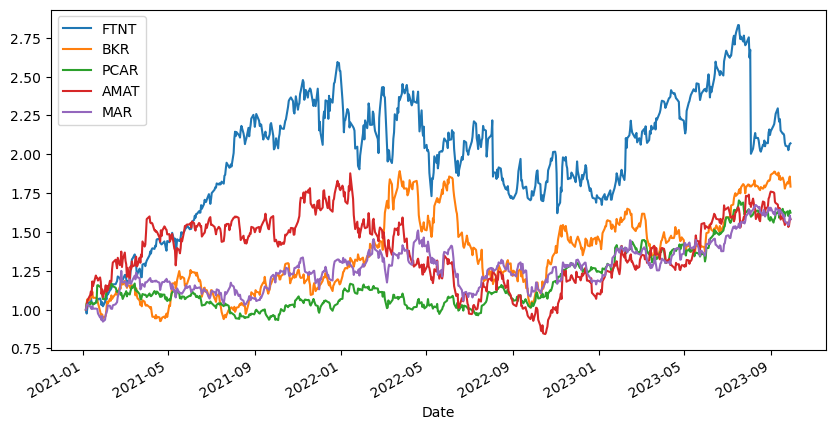

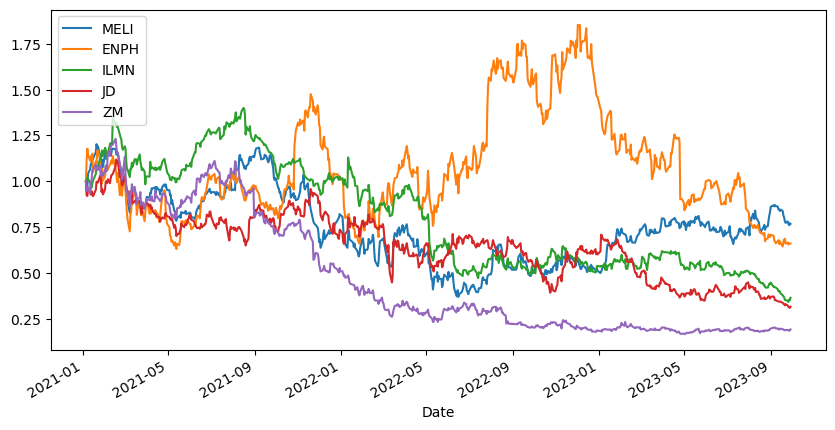

In [115]:
# Calculate cumulative returns (total) for each stock
cum_returns = (df['Adj Close'] / 
               df['Adj Close'].iloc[0])
# Select the top and the bottom 5 performing stocks
top = cum_returns.iloc[-1].sort_values(
    ascending=False)[:5].index
bottom = cum_returns.iloc[-1].sort_values(
    ascending=False)[-5:].index
# Plot the cumulative returns of 
# the top and bottom 5 stocks
cum_returns[top].plot(figsize=(10, 5))
plt.legend(loc='upper left')
plt.show()
cum_returns[bottom].plot(figsize=(10, 5))
plt.legend(loc='upper left') 
plt.show()

In [116]:
# Yearly Metrics
RoR = df[['RoR']]
print((RoR.mean() * 252).sort_values(ascending=False))
print((np.sqrt(252) * RoR.std()).sort_values(ascending=False))
ShartRatio = (RoR.mean() * 252) / ( RoR.std() * np.sqrt(252) )
print(ShartRatio.sort_values(ascending=False))

     Ticker
RoR  FTNT      0.360911
     BKR       0.291425
     AMAT      0.277661
     MAR       0.222300
     URBN      0.217922
     MRVL      0.213083
     PCAR      0.212079
     MRNA      0.207676
     INTU      0.193392
     DDOG      0.191550
     TSLA      0.189920
     AZN       0.162781
     META      0.160752
     AAPL      0.149265
     MCHP      0.142114
     AMGN      0.115798
     MDLZ      0.104787
     ZS        0.098497
     VRSK      0.091018
     ENPH      0.089262
     MELI      0.078979
     DLTR      0.066087
     KDP       0.040882
     SBUX      0.014125
     CSGP      0.003754
     SIRI      0.001766
     HON      -0.001051
     JD       -0.209126
     ILMN     -0.256507
     ZM       -0.457218
dtype: float64
     Ticker
RoR  MRNA      0.689881
     ENPH      0.664563
     DDOG      0.621441
     ZS        0.606779
     TSLA      0.600125
     JD        0.598549
     MELI      0.589092
     MRVL      0.558566
     ZM        0.529891
     META      0.485311
 

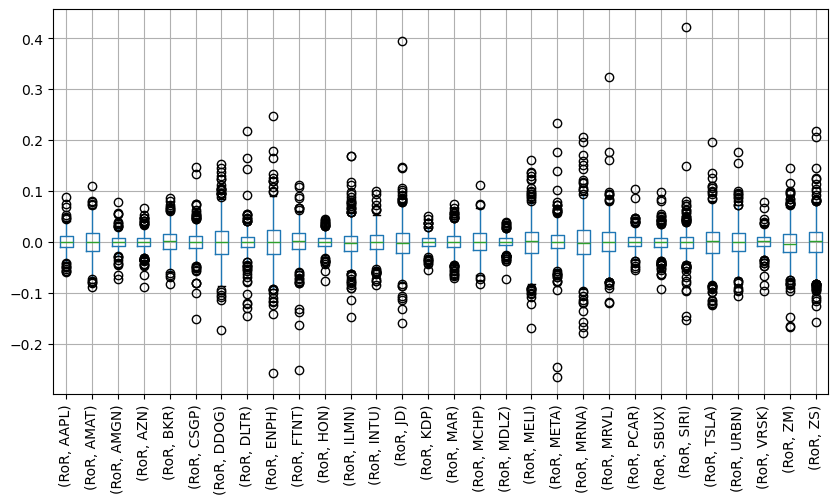

In [117]:
# Boxplot fo RoRs
plt.figure(figsize=(10,5))
RoR.boxplot()
plt.xticks(rotation=90)
plt.show()

In [118]:
RoR_statistics = pd.concat([RoR.mean() * 252, RoR.std() * np.sqrt(252),
                                  (RoR.mean() * 252) / (RoR.std()* np.sqrt(252))], axis=1,
                                  keys=['Mean', 'STD', 'ShartRatio'])
RoR_statistics.sort_values(['ShartRatio'], ascending=False)

Mean       STD  ShartRatio
    Ticker                                
RoR PCAR    0.212079  0.251930    0.841819
    FTNT    0.360911  0.449696    0.802567
    BKR     0.291425  0.384796    0.757351
    MAR     0.222300  0.319109    0.696626
    AZN     0.162781  0.242413    0.671500
    AMAT    0.277661  0.444581    0.624546
    MDLZ    0.104787  0.178451    0.587206
    AMGN    0.115798  0.206963    0.559510
    AAPL    0.149265  0.286559    0.520888
    INTU    0.193392  0.376328    0.513890
    URBN    0.217922  0.477967    0.455935
    MRVL    0.213083  0.558566    0.381482
    VRSK    0.091018  0.239436    0.380136
    MCHP    0.142114  0.399286    0.355921
    META    0.160752  0.485311    0.331235
    TSLA    0.189920  0.600125    0.316468
    DDOG    0.191550  0.621441    0.308234
    MRNA    0.207676  0.689881    0.301032
    KDP     0.040882  0.185876    0.219941
    DLTR    0.066087  0.369801    0.178710
    ZS      0.098497  0.606779    0.162327
    ENPH    0.089262  0.664563    0.134317
    MELI    0.078979  0.589092    0.134069
    SBUX    0.014125  0.277857    0.050836
    CSGP    0.003754  0.344972    0.010881
    SIRI    0.001766  0.432412    0.004084
    HON    -0.001051  0.212925   -0.004937
    JD     -0.209126  0.598549   -0.349389
    ILMN   -0.256507  0.457532   -0.560631
    ZM     -0.457218  0.529891   -0.862854

In [119]:
RoR_dayly_statistics = pd.concat([RoR.mean(), RoR.std(),
                                  RoR.mean()/ RoR.std()], axis=1,
                                  keys=['Mean', 'STD', 'ShartRatio'])
RoR_dayly_statistics.sort_values(['ShartRatio'], ascending=False)

Mean       STD  ShartRatio
    Ticker                                
RoR PCAR    0.000842  0.015870    0.053030
    FTNT    0.001432  0.028328    0.050557
    BKR     0.001156  0.024240    0.047709
    MAR     0.000882  0.020102    0.043883
    AZN     0.000646  0.015271    0.042301
    AMAT    0.001102  0.028006    0.039343
    MDLZ    0.000416  0.011241    0.036991
    AMGN    0.000460  0.013037    0.035246
    AAPL    0.000592  0.018051    0.032813
    INTU    0.000767  0.023706    0.032372
    URBN    0.000865  0.030109    0.028721
    MRVL    0.000846  0.035186    0.024031
    VRSK    0.000361  0.015083    0.023946
    MCHP    0.000564  0.025153    0.022421
    META    0.000638  0.030572    0.020866
    TSLA    0.000754  0.037804    0.019936
    DDOG    0.000760  0.039147    0.019417
    MRNA    0.000824  0.043458    0.018963
    KDP     0.000162  0.011709    0.013855
    DLTR    0.000262  0.023295    0.011258
    ZS      0.000391  0.038223    0.010226
    ENPH    0.000354  0.041864    0.008461
    MELI    0.000313  0.037109    0.008446
    SBUX    0.000056  0.017503    0.003202
    CSGP    0.000015  0.021731    0.000685
    SIRI    0.000007  0.027239    0.000257
    HON    -0.000004  0.013413   -0.000311
    JD     -0.000830  0.037705   -0.022009
    ILMN   -0.001018  0.028822   -0.035316
    ZM     -0.001814  0.033380   -0.054355

### The core financial metrics of profitability and risk assessment 

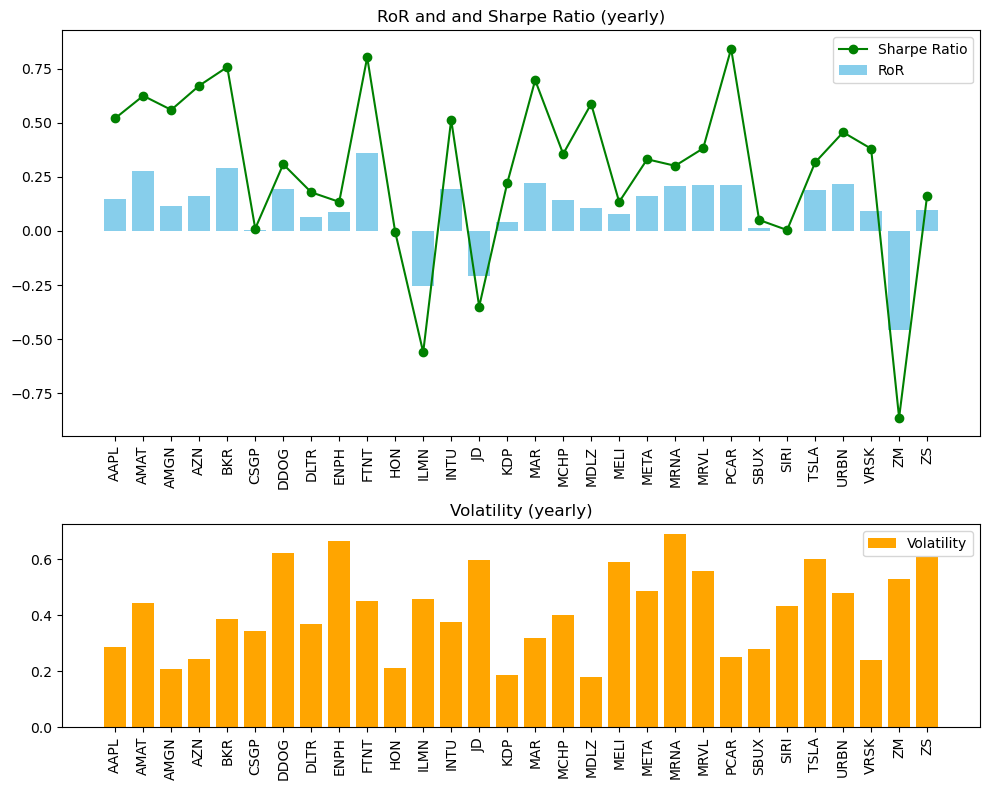

In [120]:
RoR = df['RoR']
# Calculate mean, std, and mean/std ratio (yearly)
mean_vals = RoR.mean() * 252
std_vals = RoR.std() * np.sqrt(252)
ratio_vals = mean_vals / std_vals
# Create a figure and a set of subplots (2 plots)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8),
                               gridspec_kw={'height_ratios': 
                                            [2, 1]})
# Plotting mean values as a bar plot in the first subplot
ax1.set_title('RoR and and Sharpe Ratio (yearly)')
ax1.bar(mean_vals.index, mean_vals, color='skyblue', label='RoR')
# Plotting mean/std ratio as a line plot on the same axes
ax1.plot(ratio_vals.index, ratio_vals, color='green',
         marker='o', linestyle='-', label='Sharpe Ratio')
# Rotate x-axis labels for the first subplot
ax1.tick_params(axis='x', rotation=90)
ax1.legend()
# Plotting std values as a bar plot in the second subplot
ax2.set_title('Volatility (yearly)')
ax2.bar(std_vals.index, std_vals, 
        color='orange', label='Volatility')
# Rotate x-axis labels for the second subplot
ax2.tick_params(axis='x', rotation=90)
ax2.legend()
# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

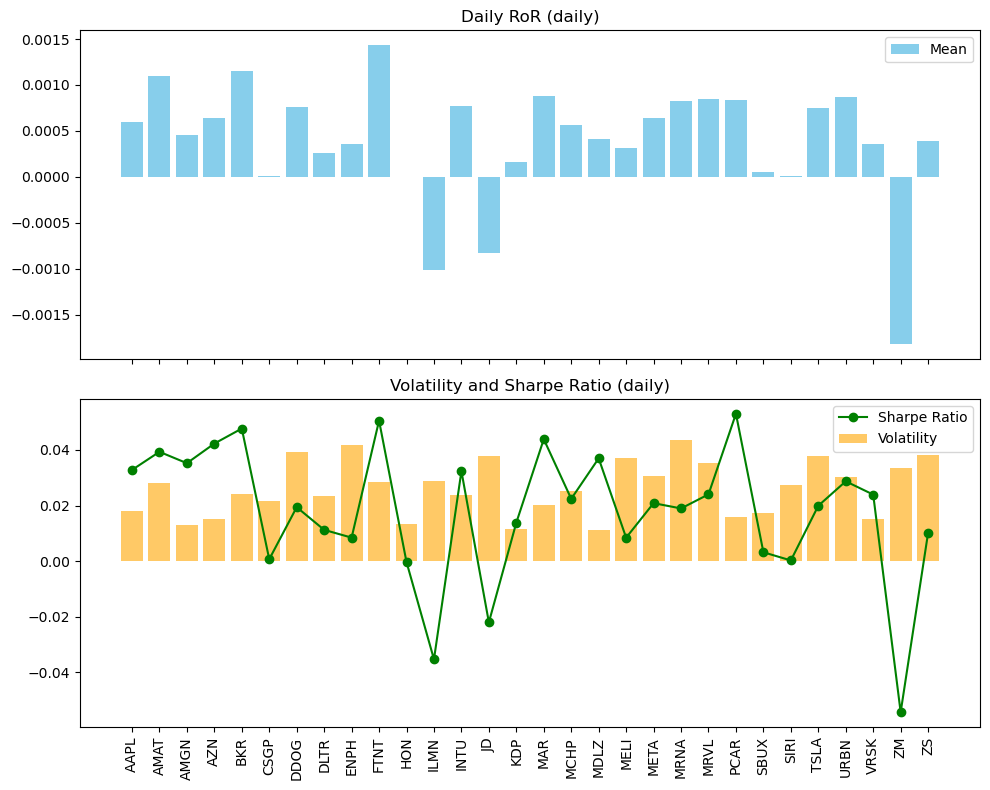

In [121]:
# Calculate mean, standard deviation, and mean/std ratio
mean_vals = RoR.mean()
std_vals = RoR.std()
ratio_vals = mean_vals / std_vals

# Create a figure and a set of subplots (2 plots) with shared x-axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plotting mean values in the first subplot
ax1.bar(mean_vals.index, mean_vals, color='skyblue', label='Mean')
ax1.legend()
ax1.set_title('Daily RoR (daily)')
ax1.tick_params(axis='x', rotation=90)

# Plotting standard deviation in the second subplot
ax2.bar(std_vals.index, std_vals, color='orange', label='Volatility', alpha=0.6)
# Plotting mean/std ratio as a line plot on the same axes as std
ax2.plot(ratio_vals.index, ratio_vals, color='green', marker='o',
         linestyle='-', label='Sharpe Ratio')
ax2.legend()
ax2.set_title('Volatility and Sharpe Ratio (daily)')
ax2.tick_params(axis='x', rotation=90)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Portfolio and correlations

In [122]:
print(df['RoR'].corr())

Ticker      AAPL      AMAT      AMGN       AZN       BKR      CSGP      DDOG  \
Ticker                                                                         
AAPL    1.000000  0.603846  0.233112  0.250908  0.190865  0.469400  0.489958   
AMAT    0.603846  1.000000  0.184789  0.184999  0.286509  0.403056  0.467259   
AMGN    0.233112  0.184789  1.000000  0.319568  0.121741  0.204070  0.009471   
AZN     0.250908  0.184999  0.319568  1.000000  0.113977  0.231891  0.133406   
BKR     0.190865  0.286509  0.121741  0.113977  1.000000  0.114129  0.124632   
CSGP    0.469400  0.403056  0.204070  0.231891  0.114129  1.000000  0.514042   
DDOG    0.489958  0.467259  0.009471  0.133406  0.124632  0.514042  1.000000   
DLTR    0.249296  0.219408  0.194818  0.106983  0.190983  0.238953  0.188993   
ENPH    0.385277  0.439721  0.116734  0.144155  0.147430  0.389655  0.411957   
FTNT    0.542912  0.494118  0.116777  0.193420  0.166784  0.448655  0.538607   
HON     0.450942  0.440489  0.317545  0.

In [123]:
# cum_returns.corr()

### Portfolio Simulation

<Axes: xlabel='Date'>

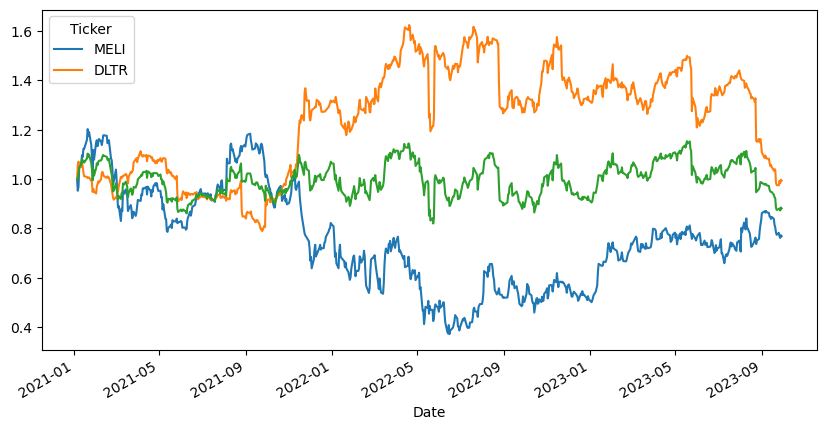

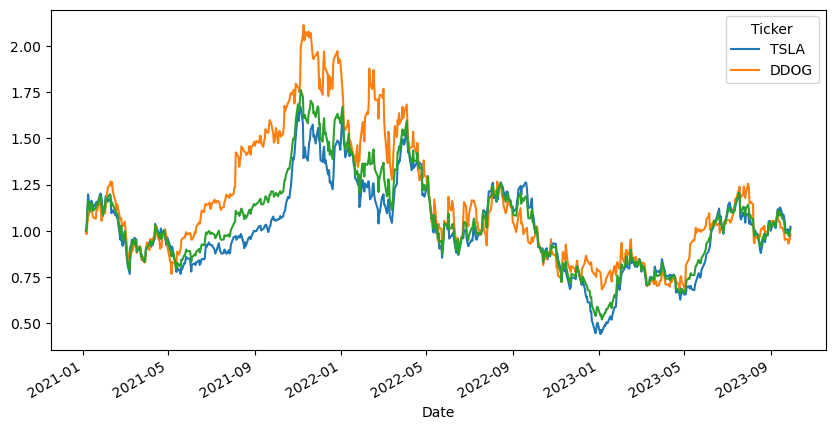

In [124]:
# Example of Portfolio Structures
portfolio1_tickers = ['MELI','DLTR']
portfolio2_tickers = ['TSLA','DDOG']
# Calculate the cumulative return for a portfolio consisting of 'MELI' and 'DLTR'
# with a 50% allocation to each
portfiloi1_cum = 0.5 * cum_returns[portfolio1_tickers[0]] + \
                 0.5 * cum_returns[portfolio1_tickers[1]]
# Plot the individual cumulative returns of 'MELI' and 'DLTR'
cum_returns[portfolio1_tickers].plot(figsize=(10, 5))
# Plot the cumulative return of the combined portfolio ('MELI' and 'DLTR')
portfiloi1_cum.plot()
# Calculate the cumulative return for another portfolio consisting of 'TSLA' and 'DDOG'
# with a 70% allocation to 'TSLA' and 30% to 'DDOG'
portfolio2_cum = 0.7 * cum_returns[portfolio2_tickers[0]] + \
                 0.3 * cum_returns[portfolio2_tickers[1]]
# Plot the individual cumulative returns of 'TSLA' and 'DDOG'
cum_returns[portfolio2_tickers].plot(figsize=(10, 5))
# Plot the cumulative return of the combined portfolio ('TSLA' and 'DDOG')
portfolio2_cum.plot()

In [125]:
def calculate_portfolio_metrics(df, w):
    # Calculate log returns
    log_RoR = (df / df.shift(1)).apply(np.log).dropna()
    # Calculate portfolio return
    pRoR = np.sum(log_RoR.mean() * w) * 252
    # Calculate standard deviation (two methods)
    sd1 = np.sqrt(np.dot(w.T, np.dot(log_RoR.cov() * 252, w)))
    sd2 = (log_RoR.mul(w).sum(axis=1).std() * 
                     np.sqrt(252))
    # Calculate Sharpe Ratio
    s_rate = pRoR / sd2
    return (pRoR, sd1, sd2, s_rate)
###########################################################
# Define the portfolio tickers
portfolio3_tickers = ['FTNT', 'BKR', 'PCAR', 'KDP', 'MDLZ']
# Allocaton Assets
np.random.seed(100)
for p in [portfolio1_tickers, 
          portfolio2_tickers, 
          portfolio3_tickers]:
    w = np.random.random(len(p))
    w /= np.sum(w)
    pm = calculate_portfolio_metrics(df['Adj Close'][p], w)
    print(f"Portfolio Assets: {p}")
    print(f"Portfolio weights: {w}")
    print(f"Rate of Return: {pm[0]}")
    print(f"Standard Deviation (Type 2): {pm[2]}")
    print(f"Sharpe Ratio: {pm[3]}")
    print()

Portfolio Assets: ['MELI', 'DLTR']
Portfolio weights: [0.66125811 0.33874189]
Rate of Return: -0.06459390136996225
Standard Deviation (Type 2): 0.43648406233426223
Sharpe Ratio: -0.14798684979360333

Portfolio Assets: ['TSLA', 'DDOG']
Portfolio weights: [0.33445182 0.66554818]
Rate of Return: -0.0025730388206032765
Standard Deviation (Type 2): 0.5358543707894354
Sharpe Ratio: -0.004801750178528179

Portfolio Assets: ['FTNT', 'BKR', 'PCAR', 'KDP', 'MDLZ']
Portfolio weights: [0.00268178 0.06908921 0.38119485 0.46934215 0.07769201]
Rate of Return: 0.10088858309875345
Standard Deviation (Type 2): 0.16815730717189403
Sharpe Ratio: 0.5999655013244412



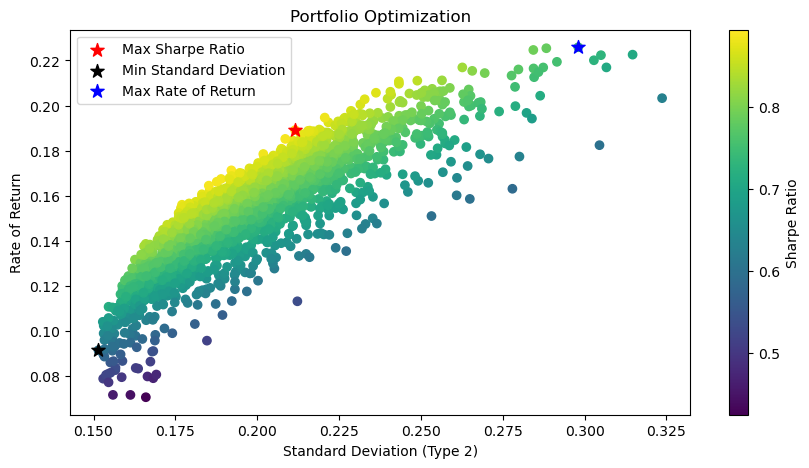

In [126]:
# Number of simulations to run
simulation_numbers = 2000
# Define the tickers for the portfolio
portfolio_tickers = portfolio3_tickers
# Generate random weights for all simulations
weights = np.random.random((simulation_numbers, 
                            len(portfolio_tickers)))
weights /= weights.sum(axis=1)[:, np.newaxis]
# Initialize arrays to store the results of the simulations
RoR_arr = np.zeros(simulation_numbers)  
sd1_arr = np.zeros(simulation_numbers)
sd2_arr = np.zeros(simulation_numbers) 
sharpe_arr = np.zeros(simulation_numbers) 
# Run simulations to calculate portfolio metrics
for i in range(simulation_numbers):
    # Current set of weights
    w = weights[i]  
    # Calculate portfolio metrics for the current weights
    portfolio_assets = df['Adj Close'][portfolio_tickers]
    m = calculate_portfolio_metrics(portfolio_assets, w)
    RoR_arr[i], sd1_arr[i], sd2_arr[i], sharpe_arr[i] = \
        m[0], m[1], m[2], m[3]
# Create a DataFrame to store the simulation results
portfolio_results = pd.DataFrame({
    'Weights': list(weights),
    'Rate of Return': RoR_arr,
    'Standard Deviation (Type 1)': sd1_arr,
    'Standard Deviation (Type 2)': sd2_arr,
    'Sharpe Ratio': sharpe_arr
})
# Scatter plot of the simulation results
plt.figure(figsize=(10, 5))
plt.scatter(portfolio_results['Standard Deviation (Type 2)'],
            portfolio_results['Rate of Return'],
            c=portfolio_results['Sharpe Ratio'], 
            cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation (Type 2)')
plt.ylabel('Rate of Return')
# Find the key points of the portfolios
# Index of the portfolio with the max Sharpe Ratio
max_sharpe_idx = portfolio_results['Sharpe Ratio'].idxmax()  
# Index of the portfolio with the min Standard Deviation
min_std_idx = portfolio_results['Standard Deviation (Type 2)'].idxmin()  
# Index of the portfolio with the max Rate of Return
max_ror_idx = portfolio_results['Rate of Return'].idxmax() 
# Highlight key points in the scatter plot
plt.scatter(portfolio_results.loc[max_sharpe_idx, 
                                  'Standard Deviation (Type 2)'],
            portfolio_results.loc[max_sharpe_idx, 'Rate of Return'],
            color='red', marker='*', s=100, 
            label='Max Sharpe Ratio')
plt.scatter(portfolio_results.loc[min_std_idx, 
                                  'Standard Deviation (Type 2)'],
            portfolio_results.loc[min_std_idx, 'Rate of Return'],
            color='black', marker='*', s=100, 
            label='Min Standard Deviation')
plt.scatter(portfolio_results.loc[max_ror_idx, 
                                  'Standard Deviation (Type 2)'],
            portfolio_results.loc[max_ror_idx, 
                                  'Rate of Return'],
            color='blue', marker='*', s=100, 
            label='Max Rate of Return')
plt.legend()
plt.title('Portfolio Optimization')
plt.show()

Weights of the Optimal Portfolio with Max Sharpe Ratio:
[0.19732183 0.20268528 0.45039686 0.00054632 0.14904971]


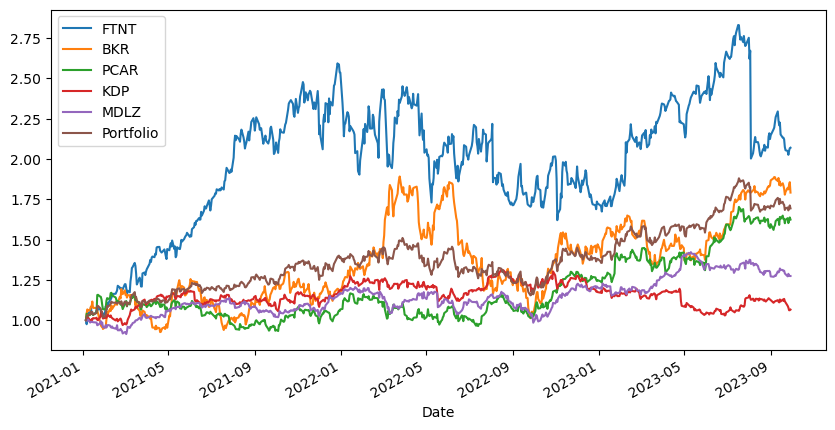

In [127]:
# Find the index of the portfolio with the maximum Sharpe Ratio
max_idx = portfolio_results['Sharpe Ratio'].idxmax()
# Retrieve the weights of the optimal portfolio
sim_weights_sharpe = portfolio_results.loc[max_idx, 'Weights']
print("Weights of the Optimal Portfolio with Max Sharpe Ratio:")
print(sim_weights_sharpe)
portfolio_cum = cum_returns[portfolio_tickers].mul(sim_weights_sharpe).sum(axis=1)
cum_returns[portfolio_tickers].plot(figsize=(10,5))
portfolio_cum.plot(label='Portfolio')
plt.legend()
plt.show()

Weights of the Optimal Portfolio with Max Sharpe Ratio:
[0.01796056 0.08582202 0.14644204 0.37015854 0.37961684]


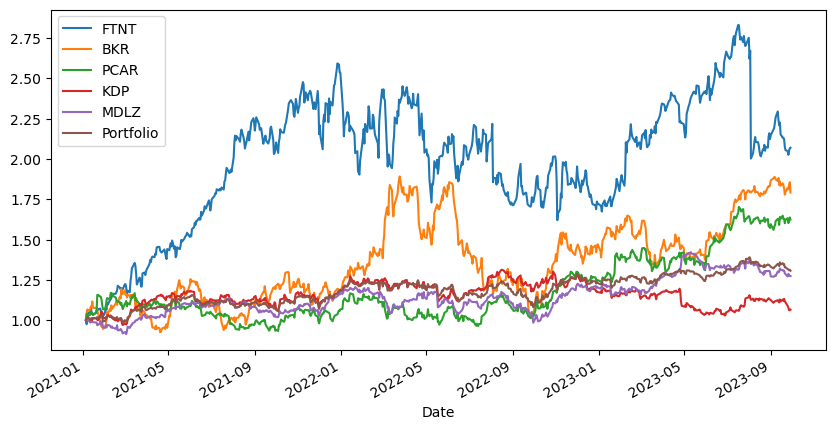

In [128]:
# Find the index of the portfolio with the minimum SD
max_idx = portfolio_results['Standard Deviation (Type 2)'].idxmin()
# Retrieve the weights of the optimal portfolio
sim_weights_vol = portfolio_results.loc[max_idx, 'Weights']
print("Weights of the Optimal Portfolio with Max Sharpe Ratio:")
print(sim_weights_vol)
portfolio_cum = cum_returns[portfolio_tickers].mul(sim_weights_vol).sum(axis=1)
cum_returns[portfolio_tickers].plot(figsize=(10,5))
portfolio_cum.plot(label='Portfolio')
plt.legend()

Weights of the Optimal Portfolio with Max Sharpe Ratio:
[0.5436419  0.2374198  0.13029665 0.01047881 0.07816284]


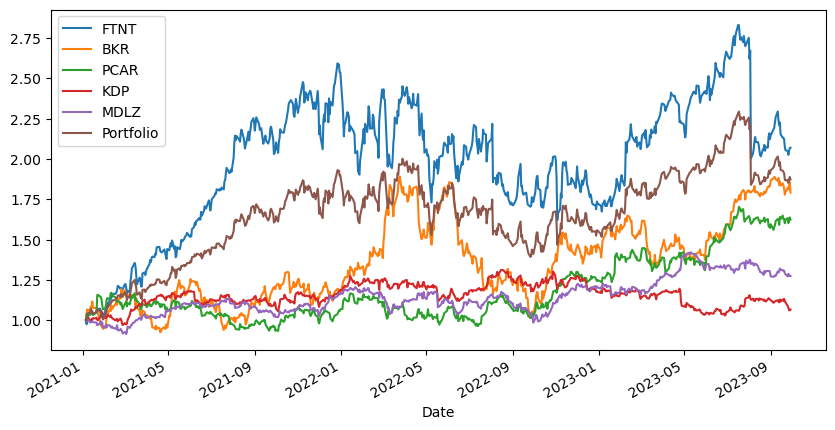

In [129]:
# Find the index of the portfolio with the maximum RoR
max_idx = portfolio_results['Rate of Return'].idxmax()
# Retrieve the weights of the optimal portfolio
sim_weights_ror = portfolio_results.loc[max_idx, 'Weights']
print("Weights of the Optimal Portfolio with Max Sharpe Ratio:")
print(sim_weights_ror)
portfolio_cum = cum_returns[portfolio_tickers].mul(sim_weights_ror).sum(axis=1)
cum_returns[portfolio_tickers].plot(figsize=(10,5))
portfolio_cum.plot(label='Portfolio')
plt.legend()

### Mathematical Optimization

In [130]:
from scipy.optimize import minimize

# Function to calculate portfolio return
def portfolio_return(weights, log_returns):
    return np.sum(log_returns.mean() * weights) * 252

# Function to calculate portfolio volatility
def portfolio_volatility(weights, log_returns):
    return np.sqrt(np.dot(weights.T,
                          np.dot(log_returns.cov() * 252, weights)))

# Function to maximize RoR (minimize negative return)
def minimize_negative_return(weights, log_returns):
    return -portfolio_return(weights, log_returns)

# Function to minimize standard deviation
def minimize_volatility(weights, log_returns):
    return portfolio_volatility(weights, log_returns)

# Function to maximize Sharpe Ratio (minimize negative Sharpe)
def minimize_negative_sharpe(weights, log_returns):
    return - (portfolio_return(weights, log_returns) /
              portfolio_volatility(weights, log_returns))

# General function to optimize the portfolio
def optimize_portfolio(log_returns, 
                       objective_function, 
                       min_ror=None, max_vol=None):
    # Number of assets in the portfolio
    num_assets = len(log_returns.columns)
    # Constraint: sum of weights equals 1
    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    # Add minimum RoR constraint if specified
    if min_ror is not None:
        constraints.append({'type': 'ineq', 'fun': lambda x:
                            portfolio_return(x, log_returns) - min_ror})
    # Add maximum volatility constraint if specified
    if max_vol is not None:
        constraints.append({'type': 'ineq', 'fun': lambda x:
                            max_vol - portfolio_volatility(x, log_returns)})
    # Bounds for each asset's weight (0% to 100%)
    bounds = tuple((0, 1) for _ in range(num_assets))
    # Initial guess for weights (even distribution)
    initial_guess = num_assets * [1. / num_assets,]
    # Minimize the objective function to find optimal weights
    opt_results = minimize(objective_function,
                           initial_guess,
                           args=(log_returns,),
                           method='SLSQP',
                           bounds=bounds,
                           constraints=constraints)
    # Print the optimal weights and metrics
    formatted_weights = [f"{weight:.2f}" for weight in opt_results.x]
    print("Optimal Weights: ", formatted_weights)
    print(f"RoR: {portfolio_return(opt_results.x, log_returns):.2f}")
    print(f"Volatility: {portfolio_volatility(opt_results.x, log_returns):.2f}")
    print()
    # Return the resulted object
    return opt_results
#################################################################
# Example usage
log_returns = np.log(df['Adj Close'][portfolio_tickers] /
                     df['Adj Close'][portfolio_tickers].shift(1))
print(portfolio_tickers)

print("Mathematical Optimization Results")
print("Optimize for maximum Sharpe Ratio:")
math_sharpe = optimize_portfolio(log_returns, minimize_negative_sharpe)
print("Optimize for maximum RoR:")
math_ror = optimize_portfolio(log_returns, minimize_negative_return)
print("Optimize for minimum Volatility:")
math_vol = optimize_portfolio(log_returns, minimize_volatility)

print("Optimize for max RoR with max Volatility constraint of 0.4")
max_vol_constraint = 0.4  # Example maximum volatility
optimal_max_ror = optimize_portfolio(log_returns,
                                     minimize_negative_return,
                                     max_vol=max_vol_constraint)

print("Optimize for min Volatility with min RoR constraint of 0.1")
min_ror_constraint = 0.1  # Example minimum rate of return
optimal_min_vol = optimize_portfolio(log_returns,
                                     minimize_volatility,
                                     min_ror=min_ror_constraint)

# Simulation results
print("Simulation Optimal Results")
for w in [sim_weights_sharpe, sim_weights_ror, sim_weights_vol]:
    print("Weights: ", [f"{weight:.2f}" for weight in w])
    print(f"RoR: {portfolio_return(w, log_returns):.2f}")
    print(f"Volatility: {portfolio_volatility(w, log_returns):.2f}")
    print()

['FTNT', 'BKR', 'PCAR', 'KDP', 'MDLZ']
Mathematical Optimization Results
Optimize for maximum Sharpe Ratio:
Optimal Weights:  ['0.17', '0.19', '0.38', '0.00', '0.26']
RoR: 0.18
Volatility: 0.20

Optimize for maximum RoR:
Optimal Weights:  ['1.00', '0.00', '0.00', '0.00', '0.00']
RoR: 0.27
Volatility: 0.46

Optimize for minimum Volatility:
Optimal Weights:  ['0.00', '0.08', '0.12', '0.36', '0.44']
RoR: 0.09
Volatility: 0.15

Optimize for max RoR with max Volatility constraint of 0.4
Optimal Weights:  ['0.83', '0.17', '0.00', '0.00', '0.00']
RoR: 0.26
Volatility: 0.40

Optimize for min Volatility with min RoR constraint of 0.1
Optimal Weights:  ['0.02', '0.09', '0.15', '0.28', '0.45']
RoR: 0.10
Volatility: 0.15

Simulation Optimal Results
Weights:  ['0.20', '0.20', '0.45', '0.00', '0.15']
RoR: 0.19
Volatility: 0.21

Weights:  ['0.54', '0.24', '0.13', '0.01', '0.08']
RoR: 0.23
Volatility: 0.30

Weights:  ['0.02', '0.09', '0.15', '0.37', '0.38']
RoR: 0.09
Volatility: 0.15



## Regressions and Capital Asset Pricing Model

[*********************100%%**********************]  1 of 1 completed

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.996537  0.995061  0.989648   0.989648 -0.434236
High       0.996537  1.000000  0.995335  0.995291   0.995291 -0.412254
Low        0.995061  0.995335  1.000000  0.996040   0.996040 -0.456084
Close      0.989648  0.995291  0.996040  1.000000   1.000000 -0.430658
Adj Close  0.989648  0.995291  0.996040  1.000000   1.000000 -0.430658
Volume    -0.434236 -0.412254 -0.456084 -0.430658  -0.430658  1.000000


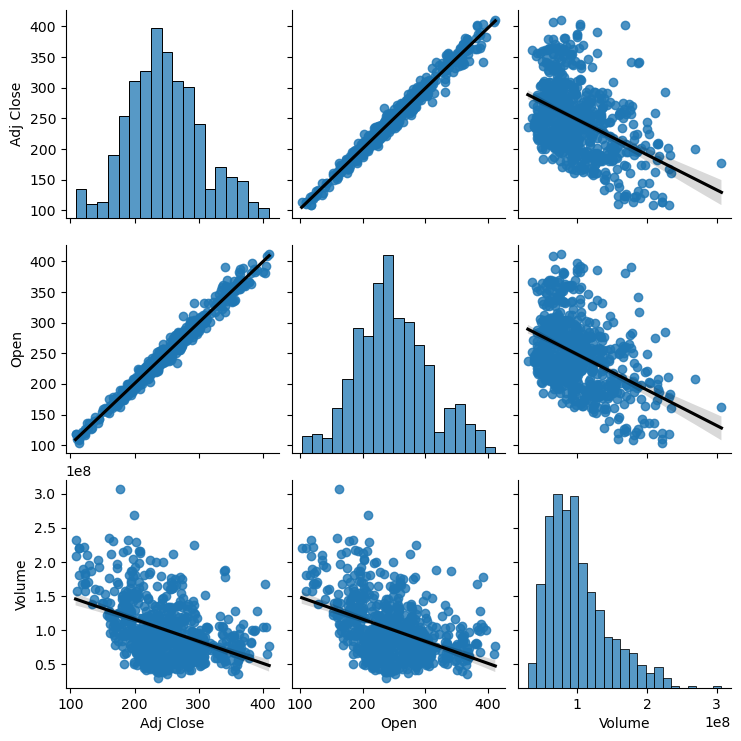

In [131]:
import statsmodels.api as sm
from scipy import stats
reg_data = yf.download('TSLA', start=start, end=end)
# Calculate the correlation matrix
corr_matrix = reg_data.corr()
print(corr_matrix)
# Create a pair plot with regression lines
sns.pairplot(reg_data[['Adj Close', 'Open', 'Volume']],
             kind='reg', plot_kws={'line_kws':{'color':'black'}})
plt.show()

In [132]:
# Define the dependent variable (e.g., Adjusted Close Price)
y = reg_data['Adj Close']
# Prepare the independent variables
# Combine them into a single DataFrame
X = reg_data[['Open', 'Volume']]
# Add a constant to the independent variables
X = sm.add_constant(X)
# Create the OLS model
model = sm.OLS(y, X)
# Fit the model
results = model.fit()
# Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.633e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:49:19   Log-Likelihood:                -2437.8
No. Observations:                 690   AIC:                             4882.
Df Residuals:                     687   BIC:                             4895.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5983      2.020      1.781      0.0

In [133]:
from scipy import stats
# Assuming 'reg_data' is your DataFrame with the necessary columns
# Define the dependent variable (e.g., Adjusted Close Price)
y = reg_data['Adj Close']
# Prepare the independent variable (e.g., 'Open')
X = reg_data['Open']
# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
# Print the results
print(f"y = {intercept:.3f} + {slope:.3f} * X")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard Error:", std_err)

y = 3.326 + 0.986 * X
Slope: 0.9857115725185064
Intercept: 3.3255537096161447
R-squared: 0.9794025403403169
P-value: 0.0
Standard Error: 0.00544981617568272


### CAPM

CAPM: r_p(t) = 0.99018 * r_m(t) + 0.00026 + errors 
Beta: 0.99018
Alpha: 0.00026
R-squared: 0.72709
P-value: 0.00000
Standard Error: 0.02314

                             OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1830.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          6.64e-196
Time:                        16:49:19   Log-Likelihood:                 2236.2
No. Observations:                 689   AIC:                            -4468.
Df Residuals:                     687   BIC:                            -4459.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

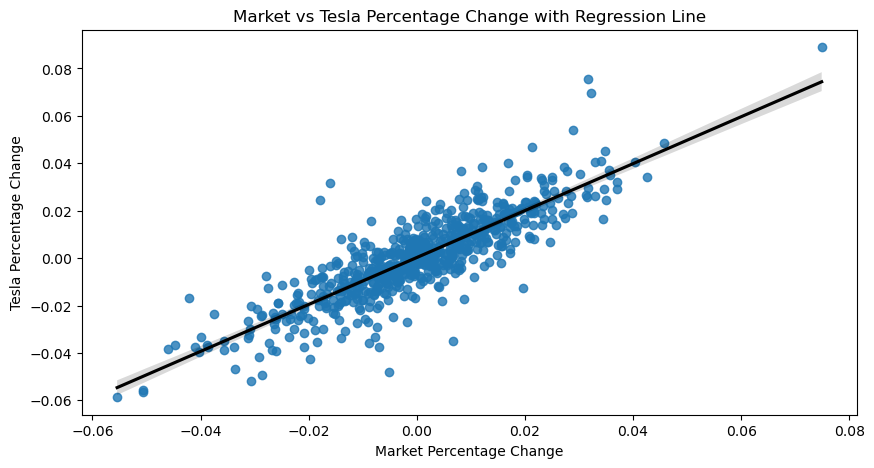

In [134]:
# Calculate percentage changes
r_m = index_data['RoR']
r_p = df['RoR']['AAPL']
# Perform linear regression to calculate beta
beta, alpha, r_value, p_value, std_err = stats.linregress(x = r_m, y = r_p)
# Print the results
print(f"CAPM: r_p(t) = {beta:.5f} * r_m(t) + {alpha:.5f} + errors ")
print(f"Beta: {beta:.5f}")
print(f"Alpha: {alpha:.5f}")
print(f"R-squared: {r_value**2:.5f}")
print(f"P-value: {p_value:.5f}")
print(f"Standard Error: {std_err:.5f}")
y = r_p
X = r_m
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print("\n", results.summary())
# Create a scatter plot with a regression line in black
plt.figure(figsize=(10,5))
sns.regplot(x=r_m, y=r_p, line_kws={"color": "black"})
# Optionally, add labels and title
plt.xlabel('Market Percentage Change')
plt.ylabel('Tesla Percentage Change')
plt.title('Market vs Tesla Percentage Change with Regression Line')
# Show the plot
plt.show()

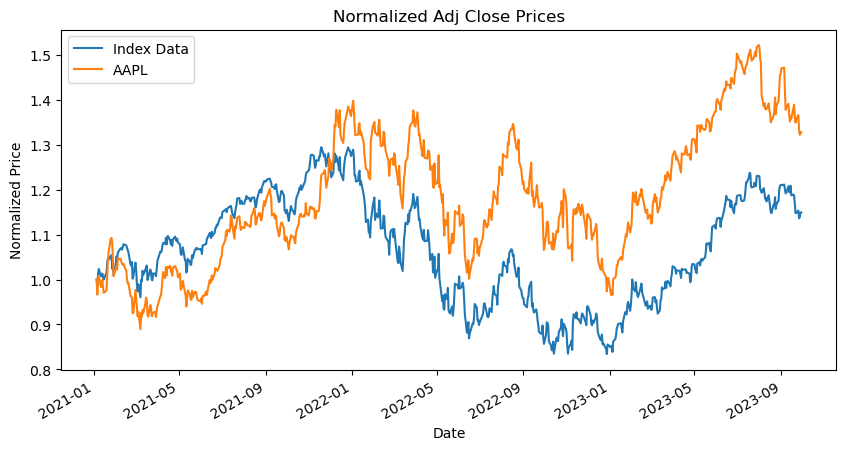

In [135]:
# plot cumulatile
normalized_index = index_data['Adj Close'] / index_data['Adj Close'].iloc[0]
normalized_tsla = df['Adj Close']['AAPL'] / df['Adj Close']['AAPL'].iloc[0]
normalized_index.plot(figsize=(10, 5), label='Index Data')
normalized_tsla.plot(label='AAPL')
plt.legend()
plt.title('Normalized Adj Close Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.show()

CAPM model: RoRi = 1.18329 * RoRm + 0.00109 + errors
Beta: 1.18329
Alpha: 0.00109
P-value: 0.00000
Standard Error: 0.053
R-square: 0.422
{'Beta': 1.183289808189309, 'Alpha': 0.0010898464140066105}


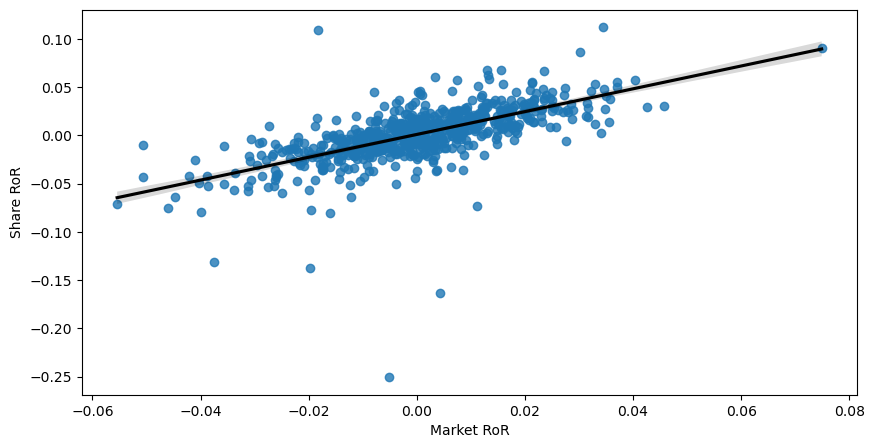

In [136]:
def analyze_CAPM(stock_data, market_data,
                 prn = True, visualization = True):
    # Calculate percentage changes (returns)
    ShareRoR = stock_data.pct_change().dropna()
    ShareRoR.name = 'Share RoR'
    MarketRoR = market_data.pct_change().dropna()
    MarketRoR.name = 'Market RoR'
    # Perform linear regression to calculate beta
    beta, alpha, r_value, p_value, std_err = stats.linregress(x = MarketRoR, 
                                                              y = ShareRoR)
    if prn:
    # Print CAPM formula
        print(f"CAPM model: RoRi = {beta:.5f} * RoRm + {alpha:.5f} + errors")
        print(f"Beta: {beta:.5f}")
        print(f"Alpha: {alpha:.5f}")
        print(f"P-value: {p_value:.5f}")
        print(f"Standard Error: {std_err:.3f}")
        print(f"R-square: {r_value**2:.3f}")
    if visualization:
        # Scatter plot with regression line
        plt.figure(figsize=(10,5))
        sns.regplot(x=MarketRoR, y=ShareRoR, 
                    line_kws={"color": "black"})  
    return({'Beta': beta, 'Alpha': alpha})
# Example usage of the function
result = analyze_CAPM(df['Adj Close']['FTNT'], index_data['Adj Close'])
print(result)

CAPM model: RoRi = 1.04978 * RoRm + 0.00052 + errors
Beta: 1.04978
Alpha: 0.00052
P-value: 0.00000
Standard Error: 0.099
R-square: 0.141


{'Beta': 1.0497784988490617, 'Alpha': 0.0005190824219849586}

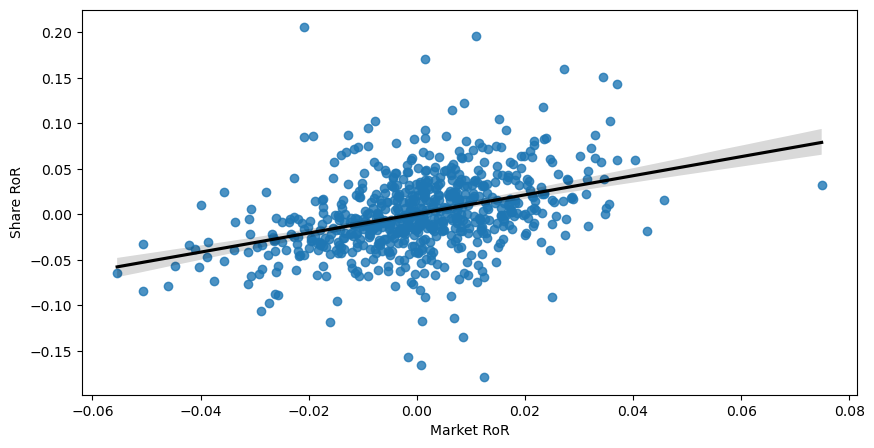

In [137]:
# Example usage of the function
analyze_CAPM(df['Adj Close']['MRNA'], index_data['Adj Close'])

### Alt Data

In [138]:
alt_tickers = ['SKYX', # SKYX Platforms Corp.
               'TSLL', # Direxion Daily TSLA Bull 1.5X Shares
               'NVDL'] # GraniteShares 1.5x Long NVDA Daily ETF
alt_data = yf.download(alt_tickers, start = start, end = end)
alt_data = alt_data.loc[:, ['Adj Close', 'Volume']]
alt_data = alt_data.sort_index()
pct_change = alt_data['Adj Close'].pct_change()
pct_change.columns = pd.MultiIndex.from_product([['RoR'],
                                                 pct_change.columns])
alt_data = pd.concat([alt_data, pct_change], axis=1)
alt_data.dropna(inplace=True)
print(alt_data.head())

[*********************100%%**********************]  3 of 3 completed

           Adj Close                   Volume                          RoR  \
Ticker          NVDL  SKYX      TSLL     NVDL    SKYX       TSLL      NVDL   
Date                                                                         
2022-12-14  1.637288  1.60  8.697541   3000.0  502700  4860000.0 -0.031501   
2022-12-15  1.533884  1.81  8.782441  13200.0  544100  5406000.0 -0.063156   
2022-12-16  1.481599  2.21  8.140975  14400.0  508000  5068300.0 -0.034086   
2022-12-19  1.439785  2.13  8.103242   3600.0  115500  6172900.0 -0.028222   
2022-12-20  1.414386  2.11  7.124249  12600.0   90000  8523900.0 -0.017641   

                                
Ticker          SKYX      TSLL  
Date                            
2022-12-14 -0.195980 -0.039583  
2022-12-15  0.131250  0.009761  
2022-12-16  0.220995 -0.073040  
2022-12-19 -0.036199 -0.004635  
2022-12-20 -0.009390 -0.120815  


CAPM model: RoRi = 0.17949 * RoRm + 0.00044 + errors
Beta: 0.17949
Alpha: 0.00044
P-value: 0.54342
Standard Error: 0.295
R-square: 0.002


{'Beta': 0.17948725270588467, 'Alpha': 0.000438500090356859}

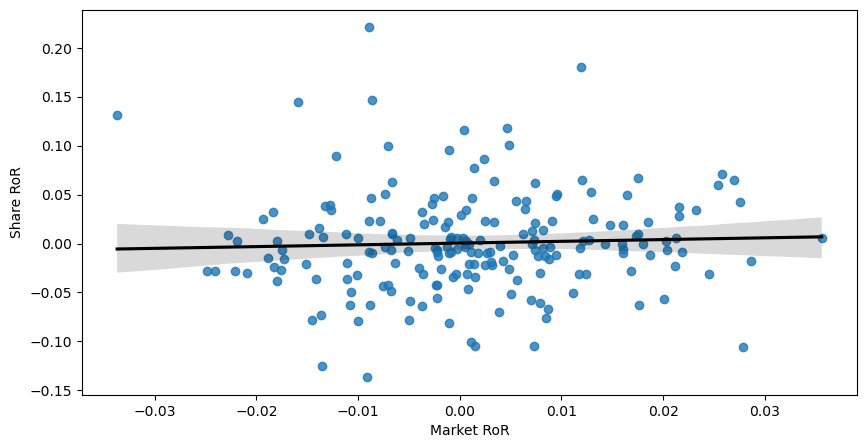

In [139]:
# Example usage of the function
analyze_CAPM(alt_data['Adj Close']['SKYX'],
             index_data.loc[index_data.index.intersection(alt_data.index),
                            'Adj Close'])

# Chapter 6
## &copy; Dr. Dmytro Zherlitsyn, 2023 <br>
## &copy; BPB Publications, 2023